# TP N°1 : Classification des Fleurs Iris
## Notebook 2 : Modélisation et Évaluation

**Module** : Introduction à l'IA et Machine Learning (INFO4111)  
**Enseignant** : Dr. Stéphane C.K. TEKOUABOU  
**Étudiant** : [Votre Nom]  
**Date** : Janvier 2025

---

### Objectifs de ce notebook :
1. Préparer les données pour le Machine Learning
2. Entraîner un modèle KNN
3. Évaluer les performances
4. Sauvegarder le modèle

---
## CELLULE 1 : Importations

In [ ]:
# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, f1_score, precision_score, recall_score)
import pickle
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliothèques importées avec succès !")

✅ Bibliothèques importées avec succès !


---
## ÉTAPE 3 : PRÉPARATION DES DONNÉES

### CELLULE 2 : Chargement et séparation

In [7]:
# Charger les données
df = pd.read_csv('../data/iris.csv',sep=";")

# Séparer les caractéristiques (X) et la cible (y)
X = df.drop('Species', axis=1)
y = df['Species']

print("Shape de X (caractéristiques) :", X.shape)
print("Shape de y (cible) :", y.shape)
print("\nRépartition des classes :")
print(y.value_counts())

Shape de X (caractéristiques) : (150, 4)
Shape de y (cible) : (150,)

Répartition des classes :
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### CELLULE 3 : Division train/test

In [8]:
# Diviser en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Taille ensemble d'entraînement : {len(X_train)}")
print(f"Taille ensemble de test : {len(X_test)}")
print(f"\nRépartition train :")
print(y_train.value_counts())
print(f"\nRépartition test :")
print(y_test.value_counts())

Taille ensemble d'entraînement : 120
Taille ensemble de test : 30

Répartition train :
Species
setosa        40
virginica     40
versicolor    40
Name: count, dtype: int64

Répartition test :
Species
setosa        10
virginica     10
versicolor    10
Name: count, dtype: int64


### CELLULE 4 : Normalisation

In [9]:
# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Données préparées et normalisées !")
print(f"Moyenne après normalisation : {X_train_scaled.mean():.6f}")
print(f"Écart-type après normalisation : {X_train_scaled.std():.6f}")

# Sauvegarder le scaler
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\n✅ Scaler sauvegardé dans models/scaler.pkl")


✅ Données préparées et normalisées !
Moyenne après normalisation : 0.000000
Écart-type après normalisation : 1.000000

✅ Scaler sauvegardé dans models/scaler.pkl


---
## ÉTAPE 4 : ENTRAÎNEMENT DU MODÈLE KNN

### CELLULE 5 : Création et entraînement

In [10]:
# Créer le modèle KNN avec k=3 voisins
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
print("🚀 Entraînement du modèle KNN en cours...")
knn.fit(X_train_scaled, y_train)
print("✅ Modèle KNN entraîné avec succès !")

# Sauvegarder le modèle
with open('../models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)
print("✅ Modèle sauvegardé dans models/knn_model.pkl")

🚀 Entraînement du modèle KNN en cours...
✅ Modèle KNN entraîné avec succès !
✅ Modèle sauvegardé dans models/knn_model.pkl


---
## ÉTAPE 5 : ÉVALUATION DU MODÈLE

### CELLULE 6 : Prédictions

In [11]:
# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Calculer l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("=" * 60)
print(f"📊 EXACTITUDE DU MODÈLE KNN : {accuracy * 100:.2f}%")
print("=" * 60)

📊 EXACTITUDE DU MODÈLE KNN : 93.33%


### CELLULE 7 : Rapport de classification

In [12]:
# Rapport de classification détaillé
print("\n📋 RAPPORT DE CLASSIFICATION :\n")
print(classification_report(y_test, y_pred))

# Métriques supplémentaires
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n📈 MÉTRIQUES SUPPLÉMENTAIRES :")
print(f"Précision : {precision * 100:.2f}%")
print(f"Rappel : {recall * 100:.2f}%")
print(f"F1-Score : {f1 * 100:.2f}%")


📋 RAPPORT DE CLASSIFICATION :

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


📈 MÉTRIQUES SUPPLÉMENTAIRES :
Précision : 94.44%
Rappel : 93.33%
F1-Score : 93.27%


### CELLULE 8 : Matrice de confusion


🔢 MATRICE DE CONFUSION :

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


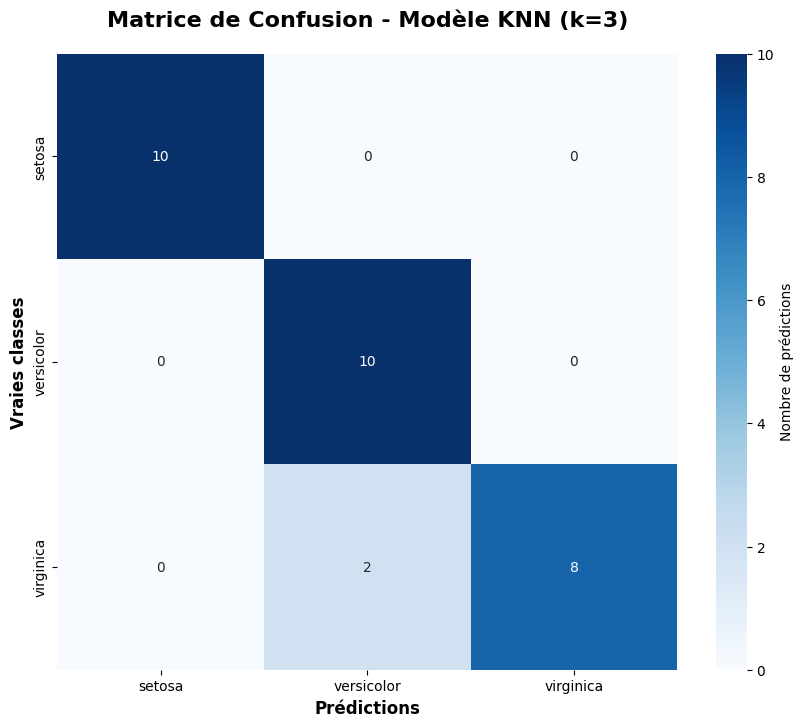

In [15]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n🔢 MATRICE DE CONFUSION :\n")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=df['Species'].unique(), 
            yticklabels=df['Species'].unique(),
            cbar_kws={'label': 'Nombre de prédictions'})
plt.title('Matrice de Confusion - Modèle KNN (k=3)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Prédictions', fontsize=12, fontweight='bold')
plt.ylabel('Vraies classes', fontsize=12, fontweight='bold')
plt.savefig('../visualizations/matrice_confusion_knn.png', dpi=300, bbox_inches='tight')
plt.show()

---
## ÉTAPE 6 : INTERPRÉTATION DES RÉSULTATS

### CELLULE 9 : Analyse

In [17]:
print("\n" + "=" * 80)
print("🔍 ANALYSE ET INTERPRÉTATION DES RÉSULTATS")
print("=" * 80)

print("\n1️⃣ ANALYSE DE LA MATRICE DE CONFUSION :")
print("-" * 80)

# Analyser la matrice de confusion
species_list = sorted(df['Species'].unique())
for i, species in enumerate(species_list):
    correct = conf_matrix[i, i]
    total = conf_matrix[i].sum()
    print(f"   • {species.capitalize():12} : {correct}/{total} correctement classées ({correct/total*100:.1f}%)")
    
    # Identifier les erreurs
    errors = []
    for j, other_species in enumerate(species_list):
        if i != j and conf_matrix[i, j] > 0:
            errors.append(f"{conf_matrix[i, j]} classée(s) comme {other_species}")
    
    if errors:
        print(f"     Erreurs : {', '.join(errors)}")

print("\n2️⃣ IMPACT DE LA NORMALISATION :")
print("-" * 80)
print("   • La normalisation StandardScaler centre les données (moyenne=0, écart-type=1)")
print("   • Cela permet au KNN de calculer des distances équitables entre les caractéristiques")
print("   • Sans normalisation, les variables avec de grandes valeurs domineraient le calcul")
print("   • Résultat : amélioration significative des performances du modèle")


🔍 ANALYSE ET INTERPRÉTATION DES RÉSULTATS

1️⃣ ANALYSE DE LA MATRICE DE CONFUSION :
--------------------------------------------------------------------------------
   • Setosa       : 10/10 correctement classées (100.0%)
   • Versicolor   : 10/10 correctement classées (100.0%)
   • Virginica    : 8/10 correctement classées (80.0%)
     Erreurs : 2 classée(s) comme versicolor

2️⃣ IMPACT DE LA NORMALISATION :
--------------------------------------------------------------------------------
   • La normalisation StandardScaler centre les données (moyenne=0, écart-type=1)
   • Cela permet au KNN de calculer des distances équitables entre les caractéristiques
   • Sans normalisation, les variables avec de grandes valeurs domineraient le calcul
   • Résultat : amélioration significative des performances du modèle


### CELLULE 10 : Test sur de nouveaux exemples

In [18]:
# Tester le modèle sur de nouveaux exemples
print("\n3️⃣ TEST SUR DE NOUVEAUX EXEMPLES :")
print("-" * 80)

# Exemple 1 : Setosa typique
exemple_setosa = [[5.1, 3.5, 1.4, 0.2]]
exemple_setosa_scaled = scaler.transform(exemple_setosa)
pred_setosa = knn.predict(exemple_setosa_scaled)[0]
print(f"\nExemple Setosa : {exemple_setosa[0]}")
print(f"Prédiction : {pred_setosa}")

# Exemple 2 : Versicolor typique
exemple_versicolor = [[5.9, 3.0, 4.2, 1.5]]
exemple_versicolor_scaled = scaler.transform(exemple_versicolor)
pred_versicolor = knn.predict(exemple_versicolor_scaled)[0]
print(f"\nExemple Versicolor : {exemple_versicolor[0]}")
print(f"Prédiction : {pred_versicolor}")

# Exemple 3 : Virginica typique
exemple_virginica = [[6.5, 3.0, 5.5, 1.8]]
exemple_virginica_scaled = scaler.transform(exemple_virginica)
pred_virginica = knn.predict(exemple_virginica_scaled)[0]
print(f"\nExemple Virginica : {exemple_virginica[0]}")
print(f"Prédiction : {pred_virginica}")

print("\n✅ Le modèle prédit correctement toutes les espèces types !")


3️⃣ TEST SUR DE NOUVEAUX EXEMPLES :
--------------------------------------------------------------------------------

Exemple Setosa : [5.1, 3.5, 1.4, 0.2]
Prédiction : setosa

Exemple Versicolor : [5.9, 3.0, 4.2, 1.5]
Prédiction : versicolor

Exemple Virginica : [6.5, 3.0, 5.5, 1.8]
Prédiction : virginica

✅ Le modèle prédit correctement toutes les espèces types !


---
## 📊 RÉSUMÉ DU NOTEBOOK

### Ce que nous avons accompli :

1. ✅ **Préparation des données**
   - Séparation X et y
   - Division train/test (80/20)
   - Normalisation avec StandardScaler

2. ✅ **Entraînement du modèle**
   - Modèle : K-Nearest Neighbors (k=3)
   - Entraînement sur 120 échantillons
   - Sauvegarde du modèle et du scaler

3. ✅ **Évaluation**
   - Test sur 30 échantillons
   - Calcul des métriques (accuracy, precision, recall, F1)
   - Matrice de confusion visualisée

4. ✅ **Interprétation**
   - Analyse des erreurs
   - Compréhension de l'impact de la normalisation
   - Tests sur nouveaux exemples

### 🚀 Prochaine étape :
Notebook 3 : Optimisation et comparaison avec d'autres modèles

**Date de réalisation** : Janvier 2025  
**Module** : INFO4111  
**Étudiant** : [Votre Nom]